In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split
import seaborn as sns

In [2]:
data = pd.read_csv("/content/sample_data/Titanic.csv")

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.drop(["PassengerId", "Name", "SibSp", "Parch", "Ticket", "Fare", "Cabin", "Embarked"], axis = "columns", inplace = True)
data.head()

,Survived,Pclass,Sex,Age
0,0,3,male,22.0
1,1,1,female,38.0
2,1,3,female,26.0
3,1,1,female,35.0
4,0,3,male,35.0


In [5]:
# Drop Y col from inputs, define ind and dep vars
X = data.drop("Survived", axis = "columns") # feature vars w/o target
Y = data["Survived"] # target var
Y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [6]:
X.Sex = X.Sex.map({"male": 1, "female": 0}) # map a library
X.head()

,Pclass,Sex,Age
0,3,1,22.0
1,1,0,38.0
2,3,0,26.0
3,1,0,35.0
4,3,1,35.0


In [7]:
X.Age[0:10]

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5     NaN
6    54.0
7     2.0
8    27.0
9    14.0
Name: Age, dtype: float64

In [8]:
# Fill in na obs
X.Age = X.Age.fillna(X.Age.mean())
X.Age[0:10]

0    22.000000
1    38.000000
2    26.000000
3    35.000000
4    35.000000
5    29.699118
6    54.000000
7     2.000000
8    27.000000
9    14.000000
Name: Age, dtype: float64

In [9]:
# Split into train/test 80/20
train_test_split(X,Y,train_size = 0.8)

[     Pclass  Sex        Age
 134       2    1  25.000000
 578       3    0  29.699118
 616       3    1  34.000000
 780       3    0  13.000000
 466       2    1  29.699118
 ..      ...  ...        ...
 270       1    1  29.699118
 610       3    0  39.000000
 876       3    1  20.000000
 284       1    1  29.699118
 452       1    1  30.000000
 
 [712 rows x 3 columns],
      Pclass  Sex        Age
 349       3    1  42.000000
 657       3    0  32.000000
 57        3    1  28.500000
 695       2    1  52.000000
 137       1    1  37.000000
 ..      ...  ...        ...
 640       3    1  20.000000
 186       3    0  29.699118
 118       1    1  24.000000
 864       2    1  24.000000
 877       3    1  19.000000
 
 [179 rows x 3 columns],
 134    0
 578    0
 616    0
 780    1
 466    0
       ..
 270    0
 610    0
 876    0
 284    0
 452    0
 Name: Survived, Length: 712, dtype: int64,
 349    0
 657    0
 57     0
 695    0
 137    0
       ..
 640    0
 186    1
 118    0
 864  

In [10]:
xTrain, xTest, yTrain, yTest = train_test_split(X, Y, train_size = 0.8)
print(len(xTrain)) # see length of train set and test set
print(len(xTest))

712
179


In [11]:
xTest

,Pclass,Sex,Age
179,3,1,36.000000
40,3,0,40.000000
486,1,0,35.000000
580,2,0,25.000000
98,2,0,34.000000
...,...,...,...
412,1,0,33.000000
443,2,0,28.000000
158,3,1,29.699118
128,3,0,29.699118


In [12]:
modelDt = tree.DecisionTreeClassifier(max_depth = 3)
modelDt

DecisionTreeClassifier(max_depth=3)

In [13]:
modelDt.fit(xTrain, yTrain)

DecisionTreeClassifier(max_depth=3)

In [14]:
# View prediction array
modelDt.predict(xTest)

array([0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0])

In [15]:
# Store result in variable
yPredDt = modelDt.predict(xTest)
print(yPredDt)
predictedArray = yPredDt
countOnes = np.sum(predictedArray == 1)
countZeros = np.sum(predictedArray == 0)
print("Count of ones: ", countOnes)
print("Count of zeros: ", countZeros)

[0 0 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 1 1 0 0
 1 1 1 1 0 1 0 0 1 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 1 0 0 1 1 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 0
 0 1 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 1
 0 1 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 1 0]
Count of ones:  57
Count of zeros:  122


In [16]:
# Show results, make df out of actual and predicted
result = pd.DataFrame({"Actual": yTest, "Predicted": yPredDt})
result

,Actual,Predicted
179,0,0
40,0,0
486,1,1
580,1,1
98,1,1
...,...,...
412,1,1
443,1,1
158,0,0
128,1,1


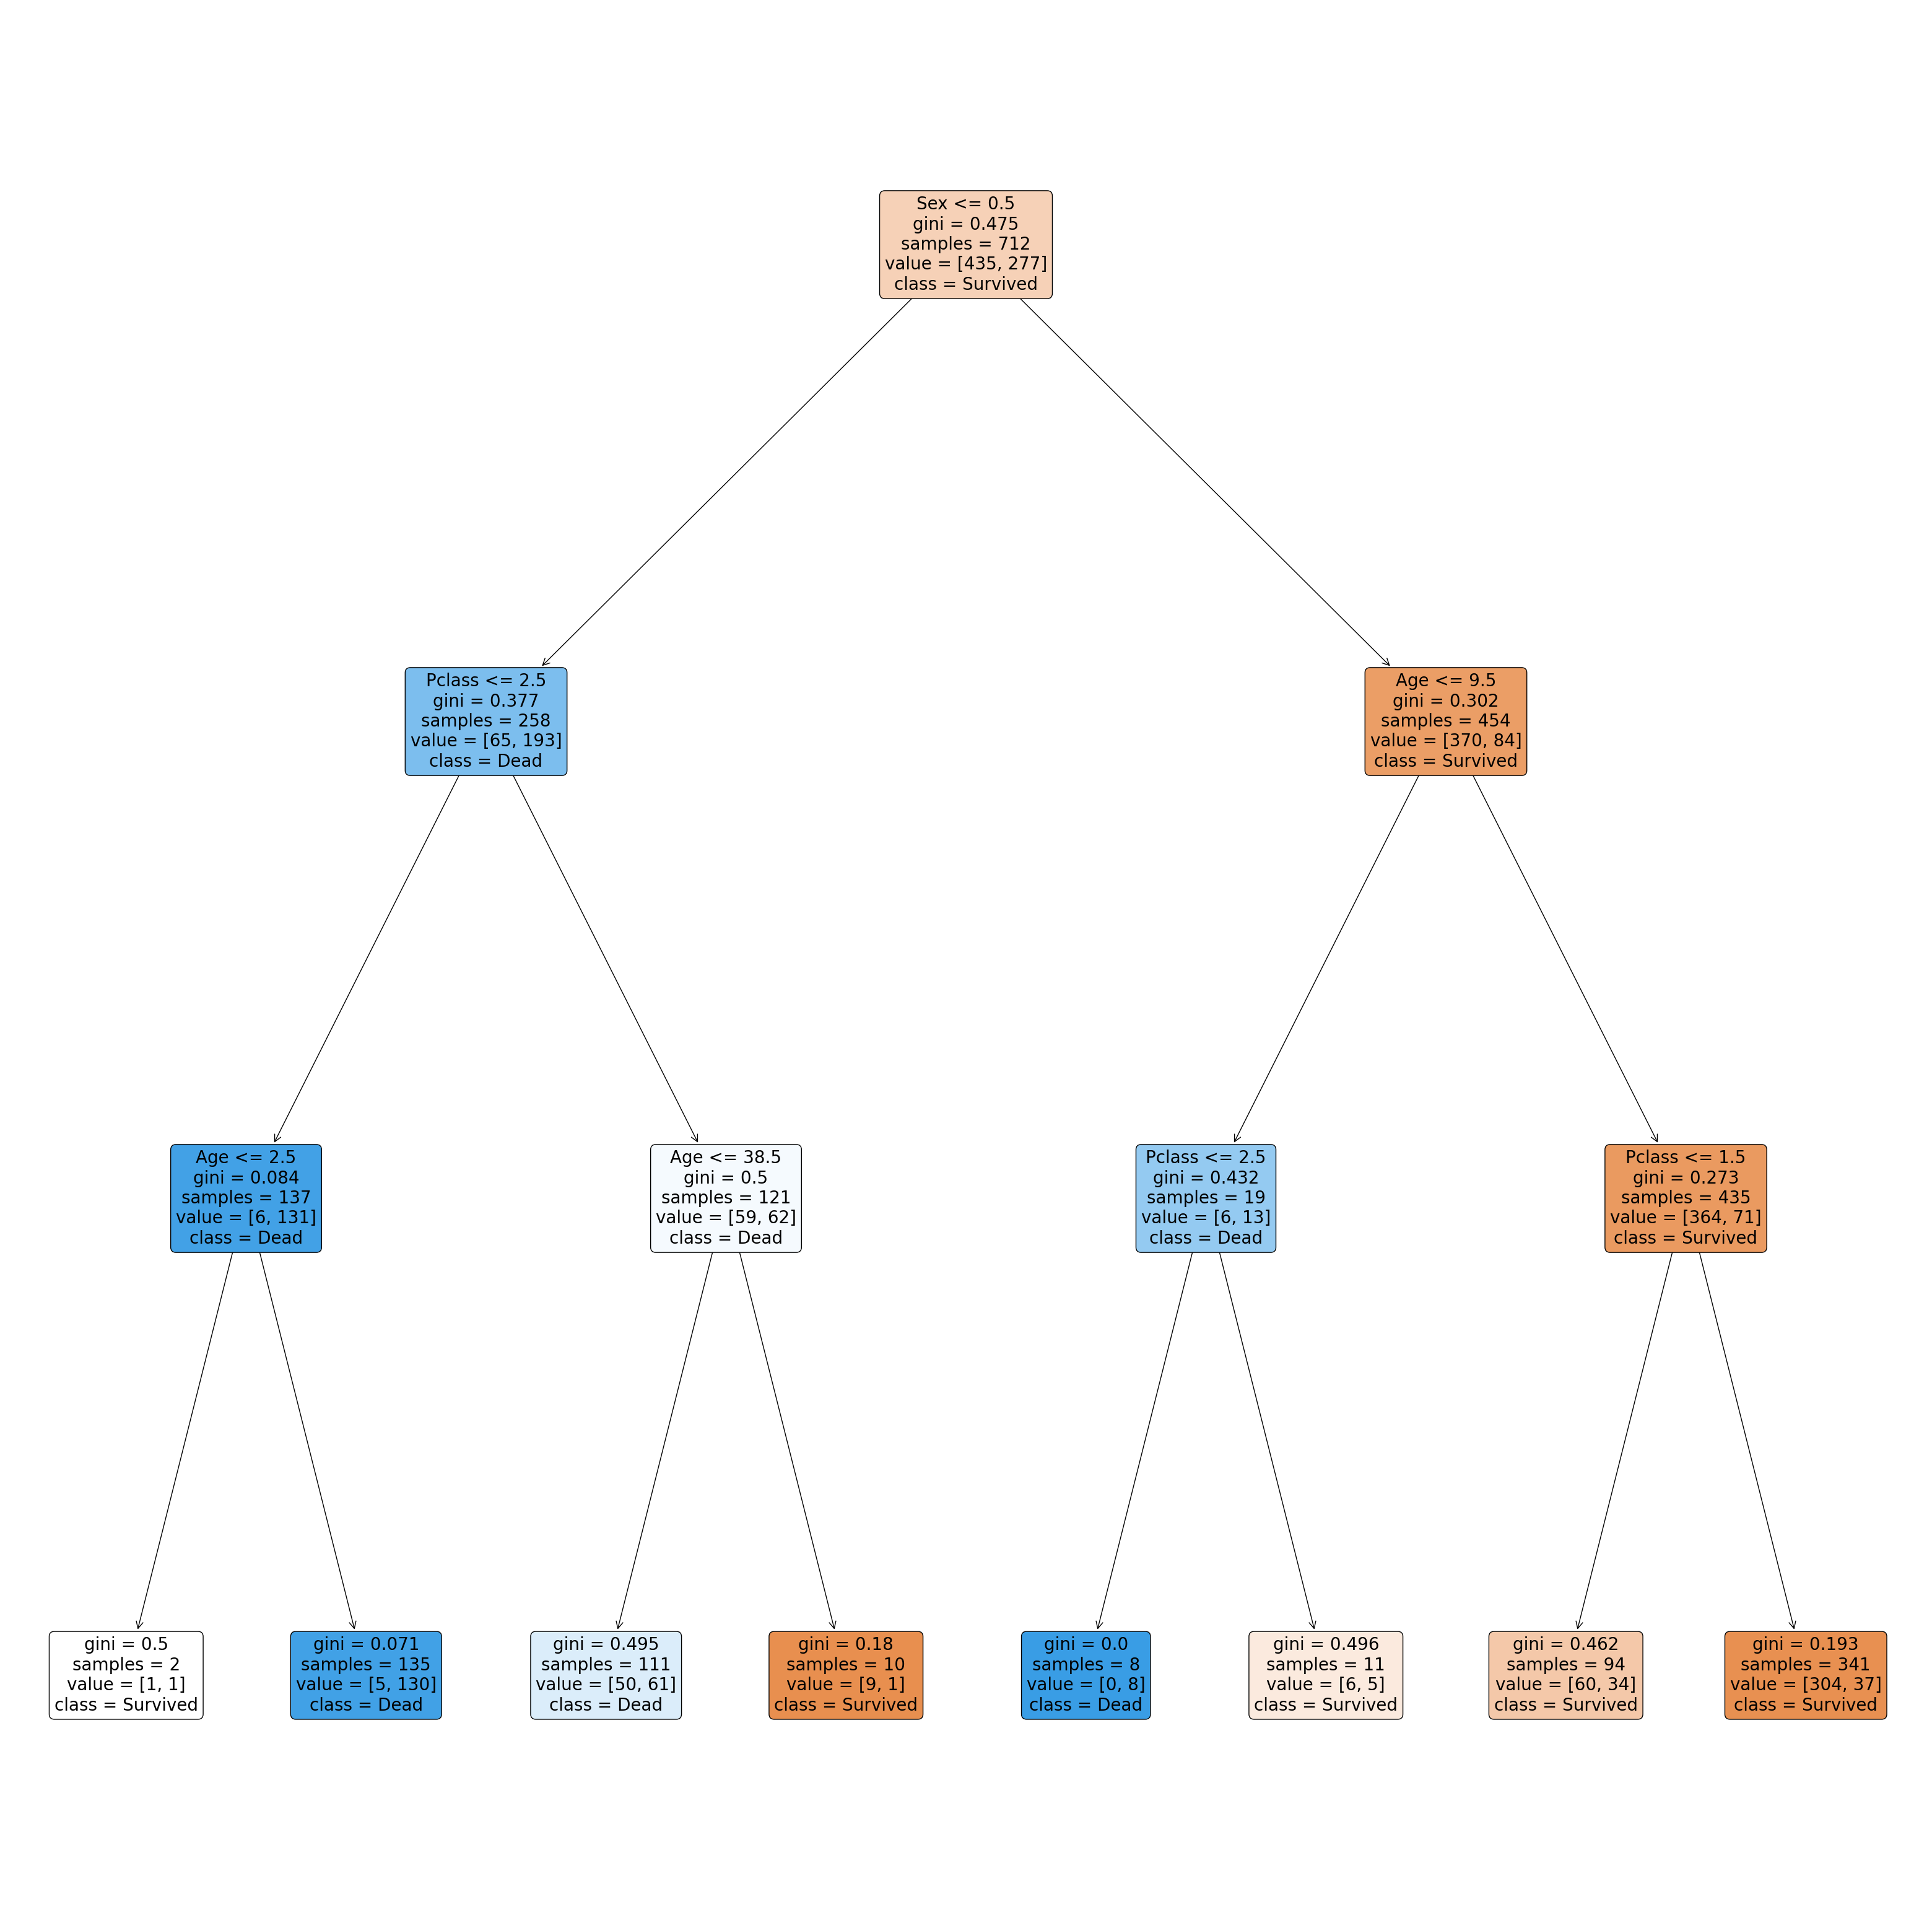

In [17]:
# Plotting the tree
plt.figure(figsize = (40,40))
graphTree = plot_tree(modelDt, feature_names = ['Pclass', 'Sex', 'Age'],
                      class_names = ['Survived', 'Dead'],
                      filled = True,
                      rounded = True,
                      fontsize = 20)

In [18]:
# Get accuracy with two different methods
accuracyDt = modelDt.score(xTest, yTest)
print(accuracyDt)

0.7988826815642458


In [19]:
from sklearn import metrics
accuracy = metrics.accuracy_score(yTest, yPredDt)
print(accuracy)

0.7988826815642458


In [20]:
# Precision
precisionDt = metrics.precision_score(yTest, yPredDt)
print(precisionDt)

0.7543859649122807


In [21]:
# Recall
metrics.recall_score(yTest, yPredDt)

0.6615384615384615

[[100  14]
 [ 22  43]]


<Axes: >

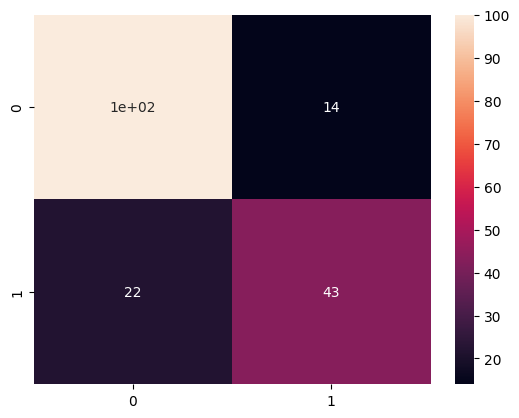

In [22]:
# Confusion matrix
import seaborn as sns
confusionMatrix = metrics.confusion_matrix(yTest, yPredDt)
print(confusionMatrix)
sns.heatmap(confusionMatrix, annot = True)

In [23]:
# AUC - ROC Curve
aucDt = metrics.roc_auc_score(yTest, yPredDt)
print(aucDt)

0.7693657219973009


In [24]:
# Cross fold validation
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [25]:
kfDt = KFold(n_splits = 5, shuffle = True)
cvDt = cross_val_score(modelDt, X, Y, cv = kfDt)
np.mean(cvDt)

0.7822923859142552

In [26]:
# Logistic regression
from sklearn.linear_model import LogisticRegression

In [27]:
modelLr = LogisticRegression(solver = 'liblinear')


In [28]:
modelLr.fit(xTrain, yTrain)

LogisticRegression(solver='liblinear')

In [29]:
yPredLg = modelLr.predict(xTest)
predictedArray = yPredLg
countOnes = np.sum(predictedArray == 1)
countZeros = np.sum(predictedArray == 0)
print("Count of ones: ", countOnes)
print("Count of zeros: ", countZeros)

Count of ones:  57
Count of zeros:  122


In [30]:
# Check accuracy
accuracyLg = modelLr.score(xTest, yTest)
print(accuracyLg)

0.776536312849162


In [31]:
accLg = metrics.accuracy_score(yTest, yPredLg)
print(accLg)

0.776536312849162


In [32]:
# Precision
precisionLg = metrics.precision_score(yTest, yPredLg)
print(precisionLg)

0.7192982456140351


In [33]:
# Recall
recLg = metrics.recall_score(yTest, yPredLg)
print(recLg)

0.6307692307692307


[[98 16]
 [24 41]]


<Axes: >

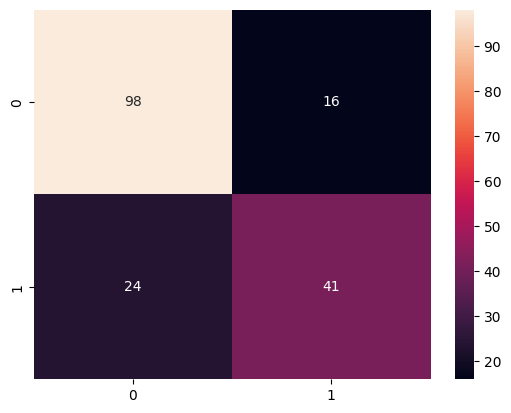

In [34]:
# COnfusion matrix
cmLg = metrics.confusion_matrix(yTest, yPredLg)
print(cmLg)
sns.heatmap(cmLg, annot = True)

In [35]:
# AUC-ROC curve
aucLg = metrics.roc_auc_score(yTest, yPredLg)
print(aucLg)

0.7452091767881242


In [36]:
# k-fold validation
kfLg = KFold(n_splits = 5, shuffle = True)
cvLg = cross_val_score(modelLr, X, Y, cv = kfLg)
np.mean(cvLg)

0.7957629778419434

In [37]:
# Support vector machines
from sklearn import svm


In [38]:
modelSvc = svm.SVC(kernel = 'linear')
modelSvc

SVC(kernel='linear')

In [39]:
# Training
modelSvc.fit(xTrain, yTrain)

SVC(kernel='linear')

In [40]:
yPredSvm = modelSvc.predict(xTest)
predictedArray = yPredSvm
countOnes = np.sum(predictedArray == 1)
countZeros = np.sum(predictedArray == 0)
print("Count of ones: ", countOnes)
print("Count of zeros: ", countZeros)

Count of ones:  56
Count of zeros:  123


In [41]:
# Accuracy
accuracySvm = modelSvc.score(xTest, yTest)
print(accuracySvm)

0.770949720670391


In [42]:
# Another way to get accuracy
from sklearn.metrics import accuracy_score
accSvm = accuracy_score(yTest, yPredSvm)
print(accSvm)

0.770949720670391


In [50]:
# Precision
precisionSvm = metrics.precision_score(yTest, yPredSvm)
print(precisionSvm)

0.7142857142857143


In [44]:
# REcall
recSvm = metrics.recall_score(yTest, yPredSvm)
print(recSvm)

0.6153846153846154


[[98 16]
 [25 40]]


<Axes: >

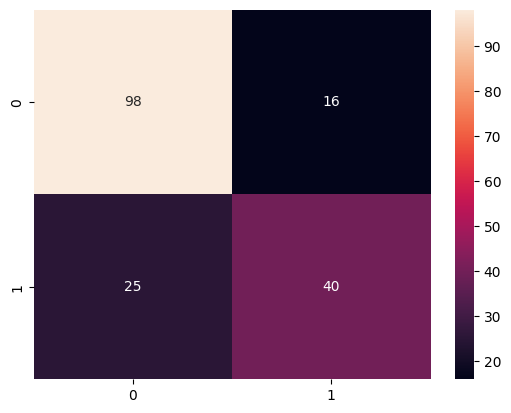

In [45]:
# COnfusion matrix
cmSvm = metrics.confusion_matrix(yTest, yPredSvm)
print(cmSvm)
sns.heatmap(cmSvm, annot = True)

In [46]:
# AUC-ROC Curve
aucSvm = metrics.roc_auc_score(yTest, yPredSvm)
print(aucSvm)

0.7375168690958165


In [47]:
# SVM k-fold cross validation
kfSvm = KFold(n_splits = 5, shuffle = True)
cvSvm = cross_val_score(modelSvc, X, Y, cv = kfSvm)
np.mean(cvSvm)

0.7867804908668634

In [48]:
# Random forest classifier
from sklearn.ensemble import RandomForestClassifier

In [49]:
modelRf = RandomForestClassifier().fit(xTrain, yTrain)

In [51]:
yPredForest = modelRf.predict(xTest)
yPredForest
predictedArray = yPredForest
countOnes = np.sum(predictedArray == 1)
countZeros = np.sum(predictedArray == 0)
print("Count of ones: ", countOnes)
print("Count of zeros: ", countZeros)

Count of ones:  65
Count of zeros:  114


In [52]:
# Accuracy
accuracyRf = modelRf.score(xTest, yTest)
print(accuracyRf)

0.8100558659217877


In [53]:
# Another way to get accuracy
accuracyRf = metrics.accuracy_score(yTest, yPredForest)
print(accuracyRf)

0.8100558659217877


In [56]:
# Precision
precisionRf = metrics.precision_score(yTest, yPredForest)
print(precisionRf)

0.7384615384615385


In [57]:
# Recall
recallRf = metrics.recall_score(yTest, yPredForest)
print(recallRf)

0.7384615384615385


[[97 17]
 [17 48]]


<Axes: >

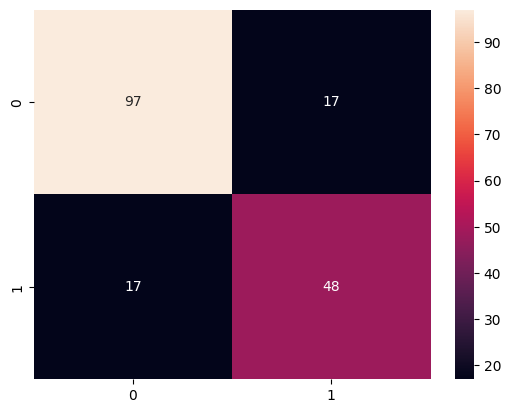

In [58]:
# Confusion matrix
cmForest = metrics.confusion_matrix(yTest, yPredForest)
print(cmForest)
sns.heatmap(cmForest, annot = True)

In [59]:
# AUC-ROC curve
aucRf = metrics.roc_auc_score(yTest, yPredForest)
print(aucRf)

0.7946693657219973


In [62]:
# Random forest - k-fold cross validation
kfForest = KFold(n_splits=5, shuffle = True)
cvForest = cross_val_score(modelRf, X, Y, cv = kfForest)
np.mean(cvForest)

0.8036532546607245

In [68]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor

In [75]:
knnModel = KNeighborsClassifier()
knnModel

KNeighborsClassifier()

In [76]:
knnModel.fit(xTrain, yTrain)

KNeighborsClassifier()

In [77]:
yPredKnn = knnModel.predict(xTest)
predictedArray = yPredKnn
countOnes = np.sum(predictedArray == 1)
countZeros = np.sum(predictedArray == 0)
print("Count of ones: ", countOnes)
print("Count of zeros: ", countZeros)

Count of ones:  59
Count of zeros:  120


In [78]:
# Performance metrics
import numpy as np

In [79]:
# We can round if we used the regressor
# rounding = np.round(yPredKnn)

In [80]:
# Accuracy
accuracyKnn = metrics.accuracy_score(yTest, yPredKnn)
print(accuracyKnn)

0.7541899441340782


In [81]:
# Precison
precisionDt = metrics.precision_score(yTest, yPredKnn)
print(precisionDt)

0.6779661016949152


In [82]:
# Recall = true positive/true positive + false neg
recallKnn = metrics.recall_score(yTest, yPredKnn)
print(recallKnn)

0.6153846153846154


[[95 19]
 [25 40]]


<Axes: >

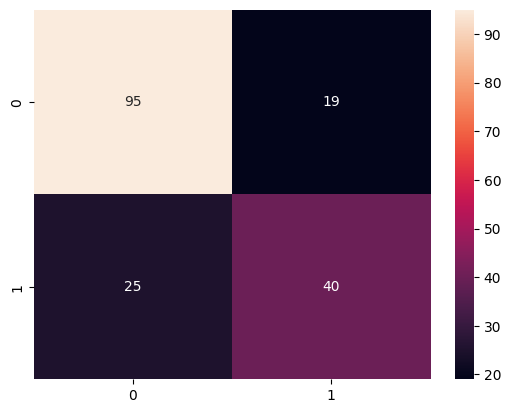

In [83]:
# confusion matrix
cmKnn = metrics.confusion_matrix(yTest, yPredKnn)
print(cmKnn)
sns.heatmap(cmKnn, annot = True)

In [84]:
# knn k-fold cross validation
kfNeighbors = KFold(n_splits = 5, shuffle = True)
cvKnn = cross_val_score(knnModel, X, Y, cv = kfNeighbors)
np.mean(cvKnn)

0.7766179147573913

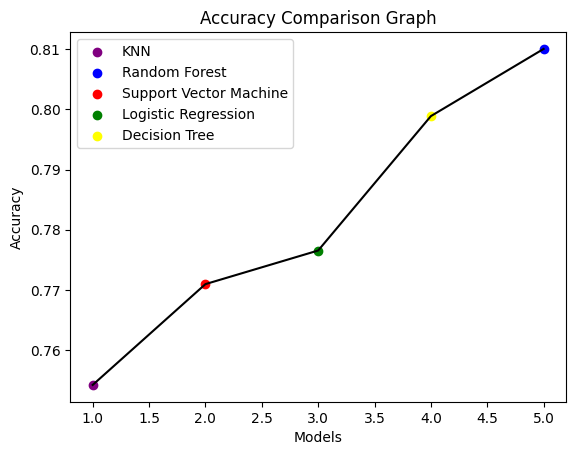

In [91]:
# Part 3 - Valuation analysis
plt.title("Accuracy Comparison Graph")
plt.xlabel("Models")
plt.ylabel("Accuracy")
y = [accuracyKnn, accuracySvm,accuracyLg, accuracyDt, accuracyRf]
plt.plot([1,2,3,4,5], y, color = "black")
plt.scatter(1,accuracyKnn, marker = "o", color = "purple", label = "KNN")
plt.scatter(5,accuracyRf, marker = "o", color = "blue", label = "Random Forest")
plt.scatter(2,accuracySvm, marker = "o", color = "red", label = "Support Vector Machine")
plt.scatter(3,accuracyLg, marker = "o", color = "green", label = "Logistic Regression")
plt.scatter(4,accuracyDt, marker = "o", color = "yellow", label = "Decision Tree")
plt.legend()
plt.show()